Project:
Problem Statement: In this dataset, we have collected information related to income evaluation across various countries. Our objective is to leverage the available features to construct a predictive model capable of discerning whether an individual's income surpasses a predefined threshold, specifically exceeding $50,000. 
By developing this model, we aim to identify and understand the key factors that contribute to higher incomes. This predictive analysis holds the potential to uncover insights into the socio-economic dynamics and employment characteristics that correlate with elevated income levels. Ultimately, the knowledge gained from this model can provide valuable information for policymakers, researchers, and individuals seeking to comprehend the determinants of financial success across diverse geographic and demographic contexts.

Ojective:Develop a predictive model to determine whether an individual's income exceeds $50,000 based on demographic and employment features. By identifying the key factors influencing higher incomes, the model aims to provide insights into socio-economic dynamics and employment characteristics. This knowledge can be valuable for policymakers, researchers, and individuals interested in understanding the determinants of financial success across diverse geographic and demographic contexts.
Features:
Age: The age of the individual.
Work-class: The type of employment (e.g., private, self-employed, government).
Final_census: A variable related to the final census count.
Education: The highest level of education attained by the individual.
Education Num:
Marital Status: Whether the individual is married, single, divorced, etc.
Occupation: The type of job or profession.
Relationship: The individual's relationship status (e.g., husband, wife, own-child).
Race: The racial background of the individual.
Gender: The gender of the individual.
Capital-gain: The financial gains an individual has made.
Capital-loss: The financial losses an individual has incurred.
Hours/week: The number of hours worked per week.
Country: The country of residence.

In [1]:
# Import basic libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load  dataset into a Pandas DataFrame
df = pd.read_csv("D:\\C\\Desktop\\Data_inc.csv")
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [3]:
df.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income', 'Unnamed: 15'],
      dtype='object')

In [4]:
unique_Age = sorted(df['Age'].unique())
print("unique_Age:",unique_Age)

unique_Age: [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90]


In [5]:
unique_Age = df['Age'].value_counts()
# Sort the counts based on the age values
sorted_age_counts = unique_Age.sort_index()
print("Sorted Age Counts:",sorted_age_counts)
#print(sorted_age_counts)

Sorted Age Counts: Age
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: count, Length: 73, dtype: int64


In [6]:
unique_profession_classes = df['Profession Class'].unique()
unique_profession_classes

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
unique_profession_classes = df['Profession Class'].value_counts()
unique_profession_classes

Profession Class
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [8]:
unique_Final_census = sorted(df['Final_census'].unique())
print("unique_Final_census:",unique_Final_census)


unique_Final_census: [12285, 13769, 14878, 18827, 19214, 19302, 19395, 19410, 19491, 19520, 19700, 19752, 19793, 19847, 19899, 19914, 20057, 20098, 20101, 20109, 20179, 20296, 20308, 20323, 20333, 20438, 20469, 20507, 20511, 20534, 20676, 20728, 20795, 20809, 20953, 20956, 21095, 21101, 21154, 21174, 21306, 21472, 21626, 21698, 21792, 21856, 21876, 21906, 22042, 22055, 22154, 22155, 22186, 22201, 22211, 22245, 22313, 22328, 22418, 22422, 22428, 22463, 22494, 22546, 22641, 22743, 22831, 22900, 22907, 22966, 22978, 23037, 23074, 23157, 23233, 23324, 23438, 23494, 23510, 23545, 23580, 23621, 23646, 23686, 23698, 23740, 23776, 23778, 23780, 23789, 23813, 23871, 23892, 23940, 24008, 24013, 24046, 24050, 24090, 24106, 24108, 24127, 24139, 24153, 24185, 24215, 24243, 24264, 24266, 24292, 24342, 24344, 24364, 24384, 24395, 24473, 24504, 24515, 24529, 24562, 24647, 24694, 24712, 24721, 24723, 24728, 24763, 24790, 24824, 24872, 24896, 24961, 24967, 24982, 25005, 25031, 25045, 25051, 25124, 25139

In [9]:
unique_Final_census = df['Final_census'].value_counts()

sorted_unique_Final_census = unique_Final_census.sort_index()
print("sorted_unique_Final_census:",sorted_unique_Final_census)


sorted_unique_Final_census: Final_census
12285      1
13769      1
14878      1
18827      1
19214      1
          ..
1226583    1
1268339    1
1366120    1
1455435    1
1484705    1
Name: count, Length: 21648, dtype: int64


In [10]:
unique_Education = df[' Education'].unique()
unique_Education

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [11]:
unique_Education = df[' Education'].value_counts()
unique_Education

 Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [12]:
unique_Educationnum = sorted(df[' Education-num'].unique())
unique_Educationnum

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [13]:
unique_Educationnum = df[' Education-num'].value_counts()
sorted_unique_Educationnum = unique_Educationnum.sort_index()
print("sorted_unique_Educationnum:",sorted_unique_Educationnum)

sorted_unique_Educationnum:  Education-num
1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
Name: count, dtype: int64


In [14]:
unique_maritalstatus = df[' marital-status'].unique()
unique_maritalstatus

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [15]:
unique_maritalstatus = df[' marital-status'].value_counts()
unique_maritalstatus


 marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [16]:
unique_occupation = df[' occupation'].unique()
unique_occupation

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
unique_occupation = df[' occupation'].value_counts()
unique_occupation

 occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [18]:
unique_relationship = df[' relationship'].unique()
unique_relationship

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [19]:
unique_relationship = df[' relationship'].value_counts()
unique_relationship

 relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [20]:
unique_race = df[' race'].unique()
unique_race

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [21]:
unique_race = df[' race'].value_counts()
print("unique_race:",unique_race)

unique_race:  race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64


In [22]:
unique_Gender = df['Gender'].unique()
unique_Gender

array([' Male', ' Female'], dtype=object)

In [23]:
unique_Gender = df['Gender'].value_counts()
print("unique_Gender:",unique_Gender)

unique_Gender: Gender
 Male      21790
 Female    10771
Name: count, dtype: int64


In [24]:
unique_capitalgain= sorted(df[' capital-gain'].unique())
print("unique_capitalgain:",unique_capitalgain)

unique_capitalgain: [0, 114, 401, 594, 914, 991, 1055, 1086, 1111, 1151, 1173, 1409, 1424, 1455, 1471, 1506, 1639, 1797, 1831, 1848, 2009, 2036, 2050, 2062, 2105, 2174, 2176, 2202, 2228, 2290, 2329, 2346, 2354, 2387, 2407, 2414, 2463, 2538, 2580, 2597, 2635, 2653, 2829, 2885, 2907, 2936, 2961, 2964, 2977, 2993, 3103, 3137, 3273, 3325, 3411, 3418, 3432, 3456, 3464, 3471, 3674, 3781, 3818, 3887, 3908, 3942, 4064, 4101, 4386, 4416, 4508, 4650, 4687, 4787, 4865, 4931, 4934, 5013, 5060, 5178, 5455, 5556, 5721, 6097, 6360, 6418, 6497, 6514, 6723, 6767, 6849, 7298, 7430, 7443, 7688, 7896, 7978, 8614, 9386, 9562, 10520, 10566, 10605, 11678, 13550, 14084, 14344, 15020, 15024, 15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095, 41310, 99999]


In [25]:
unique_capitalgain = df[' capital-gain'].value_counts()
sorted_unique_capitalgain = unique_capitalgain.sort_index()
print("sorted_unique_capitalgain:",sorted_unique_capitalgain)

sorted_unique_capitalgain:  capital-gain
0        29849
114          6
401          2
594         34
914          8
         ...  
25236       11
27828       34
34095        5
41310        2
99999      159
Name: count, Length: 119, dtype: int64


In [26]:
unique_capitalloss = sorted(df[' capital-loss'].unique())
print("unique_capitalloss:",unique_capitalloss)

unique_capitalloss: [0, 155, 213, 323, 419, 625, 653, 810, 880, 974, 1092, 1138, 1258, 1340, 1380, 1408, 1411, 1485, 1504, 1539, 1564, 1573, 1579, 1590, 1594, 1602, 1617, 1628, 1648, 1651, 1668, 1669, 1672, 1719, 1721, 1726, 1735, 1740, 1741, 1755, 1762, 1816, 1825, 1844, 1848, 1876, 1887, 1902, 1944, 1974, 1977, 1980, 2001, 2002, 2042, 2051, 2057, 2080, 2129, 2149, 2163, 2174, 2179, 2201, 2205, 2206, 2231, 2238, 2246, 2258, 2267, 2282, 2339, 2352, 2377, 2392, 2415, 2444, 2457, 2467, 2472, 2489, 2547, 2559, 2603, 2754, 2824, 3004, 3683, 3770, 3900, 4356]


In [27]:
unique_capitalloss = df[' capital-loss'].value_counts()
sorted_unique_capitalloss = unique_capitalloss.sort_index()
print("sorted_unique_capitalloss:",sorted_unique_capitalloss)

sorted_unique_capitalloss:  capital-loss
0       31042
155         1
213         4
323         3
419         3
        ...  
3004        2
3683        2
3770        2
3900        2
4356        3
Name: count, Length: 92, dtype: int64


In [28]:
unique_hoursperweek = sorted(df[' hours-per-week'].unique())
print("unique_hoursperweek :",unique_hoursperweek)

unique_hoursperweek : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99]


In [29]:
#pd.set_option('display.max_rows', None)
hours_per_week_counts = df[' hours-per-week'].value_counts()

sorted_hours_per_week_counts = hours_per_week_counts.sort_index()
print("sorted_hours_per_week_counts:",hours_per_week_counts)

sorted_hours_per_week_counts:  hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64


In [30]:
unique_country = df[' country'].unique()
unique_country

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [31]:
country_counts = df[' country'].value_counts()
print("Country Counts:",country_counts)

Country Counts:  country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru        

In [32]:
unique_income = df[' income'].unique()
unique_income

array([' <=50K', ' >50K'], dtype=object)

In [33]:
unique_income = df[' income'].value_counts()
unique_income

 income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [34]:
# Assuming you have replaced '?' with 0 in the 'country' column
df[' country'] = df[' country'].replace('?', 0)

# Group the data by 'country' and 'income' and count occurrences
grouped_df = df.groupby([' country', ' income']).size().unstack(fill_value=0)

# Print the resulting DataFrame
print("Income Distribution by Country:")
print(grouped_df)

Income Distribution by Country:
 income                       <=50K   >50K
 country                                  
 ?                              437    146
 Cambodia                        12      7
 Canada                          82     39
 China                           55     20
 Columbia                        57      2
 Cuba                            70     25
 Dominican-Republic              68      2
 Ecuador                         24      4
 El-Salvador                     97      9
 England                         60     30
 France                          17     12
 Germany                         93     44
 Greece                          21      8
 Guatemala                       61      3
 Haiti                           40      4
 Holand-Netherlands               1      0
 Honduras                        12      1
 Hong                            14      6
 Hungary                         10      3
 India                           60     40
 Iran                 

In [35]:
# Assuming you have replaced '?' with 0 in the 'ProfessionClass column
df['Profession Class'] = df['Profession Class'].replace('?', 0)

# Group the data by 'country' and 'income' and count occurrences
grouped_df = df.groupby(['Profession Class', ' income']).size().unstack(fill_value=0)

# Print the resulting DataFrame
print("Income Distribution by ProfessionClass:")
print(grouped_df)

Income Distribution by ProfessionClass:
 income             <=50K   >50K
Profession Class                
 ?                   1645    191
 Federal-gov          589    371
 Local-gov           1476    617
 Never-worked           7      0
 Private            17733   4963
 Self-emp-inc         494    622
 Self-emp-not-inc    1817    724
 State-gov            945    353
 Without-pay           14      0


In [36]:
# Assuming you have replaced '?' with 0 in the Occupation column
df[' occupation'] = df[' occupation'].replace('?', 0)

# Group the data by 'country' and 'income' and count occurrences
grouped_df = df.groupby([' occupation', ' income']).size().unstack(fill_value=0)

# Print the resulting DataFrame
print("Income Distribution by Occupation:")
print(grouped_df)

Income Distribution by Occupation:
 income              <=50K   >50K
 occupation                      
 ?                    1652    191
 Adm-clerical         3263    507
 Armed-Forces            8      1
 Craft-repair         3170    929
 Exec-managerial      2098   1968
 Farming-fishing       879    115
 Handlers-cleaners    1284     86
 Machine-op-inspct    1752    250
 Other-service        3158    137
 Priv-house-serv       148      1
 Prof-specialty       2281   1859
 Protective-serv       438    211
 Sales                2667    983
 Tech-support          645    283
 Transport-moving     1277    320


In [38]:
df.shape

(32561, 16)

In [51]:
df1 = df.copy()
df1.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [53]:
# Check for missing values
df1.isnull().sum()

Age                     0
Profession Class        0
Final_census            0
 Education              0
 Education-num          0
 marital-status         0
 occupation             0
 relationship           0
 race                   0
Gender                  0
 capital-gain           0
 capital-loss           0
 hours-per-week         0
 country                0
 income                 0
Unnamed: 15         32559
dtype: int64

In [54]:
df1.dtypes

Age                   int64
Profession Class     object
Final_census          int64
 Education           object
 Education-num        int64
 marital-status      object
 occupation          object
 relationship        object
 race                object
Gender               object
 capital-gain         int64
 capital-loss         int64
 hours-per-week       int64
 country             object
 income              object
Unnamed: 15         float64
dtype: object

In [55]:
df1.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income', 'Unnamed: 15'],
      dtype='object')

In [56]:
df1.shape

(32561, 16)

In [57]:
# Assuming 'Unnamed: 15' is the name of the column you want to drop
df1 = df1.drop('Unnamed: 15', axis=1)
df1

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [58]:
df1.shape

(32561, 15)

In [59]:
df1.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income'],
      dtype='object')

###  Very first I try to convert category type inputs into number using encoding criterion

#Education,Marital Status,Relationship,Gender: 
#These column  have an ordinal relationship I used label encoding is used.

In [60]:
from sklearn.preprocessing import LabelEncoder
# Columns to be label encoded
columns_to_encode = [' Education',' marital-status',' relationship','Gender']

label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for column in columns_to_encode:
    df1[column + '_encoded'] = label_encoder.fit_transform(df[column])
    # Save the label encoder to a file

    df1 = df1.drop(column, axis=1) # drop original column
df1
label_encoder_path = 'label_encoder.joblib'
joblib.dump(label_encoder, label_encoder_path)

['label_encoder.joblib']

# To convert category into number Encoding Criterion

#Profession Class, Occupation,Country,Race: Depending on the nature of the classes (no inherent order) explore one-hot encoding.

In [61]:
# Assuming 'Profession Class', 'occupation', 'race' are the columns to be one-hot encoded
columns_to_one_hot_encode = ['Profession Class',' occupation', ' race',' country']

# Apply one-hot encoding to the specified columns
df1 = pd.get_dummies(df1, columns=columns_to_one_hot_encode)


# Display the DataFrame with one-hot encoded columns
df1


,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,income,Education_encoded,marital-status_encoded,relationship_encoded,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,9,4,1,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,9,2,0,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,11,0,1,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,1,2,0,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,9,2,5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,7,2,5,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,0,0,40,>50K,11,2,0,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,40,<=50K,11,6,4,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,0,0,20,<=50K,11,4,3,...,False,False,False,False,False,False,False,True,False,False


In [62]:
pd.set_option('display.max_columns',None)
df1.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,income,Education_encoded,marital-status_encoded,relationship_encoded,Gender_encoded,Profession Class_ ?,Profession Class_ Federal-gov,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,country_ ?,country_ Cambodia,country_ Canada,country_ China,country_ Columbia,country_ Cuba,country_ Dominican-Republic,country_ Ecuador,country_ El-Salvador,country_ England,country_ France,country_ Germany,country_ Greece,country_ Guatemala,country_ Haiti,country_ Holand-Netherlands,country_ Honduras,country_ Hong,country_ Hungary,country_ India,country_ Iran,country_ Ireland,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,9,4,1,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,9,2,0,1,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,11,0,1,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,1,2,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,9,2,5,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
print(df1.dtypes)

Age                          int64
Final_census                 int64
 Education-num               int64
 capital-gain                int64
 capital-loss                int64
                             ...  
 country_ Thailand            bool
 country_ Trinadad&Tobago     bool
 country_ United-States       bool
 country_ Vietnam             bool
 country_ Yugoslavia          bool
Length: 82, dtype: object


In [66]:
df1.columns

Index(['Age', 'Final_census', ' Education-num', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' income', ' Education_encoded',
       ' marital-status_encoded', ' relationship_encoded', 'Gender_encoded',
       'Profession Class_ ?', 'Profession Class_ Federal-gov',
       'Profession Class_ Local-gov', 'Profession Class_ Never-worked',
       'Profession Class_ Private', 'Profession Class_ Self-emp-inc',
       'Profession Class_ Self-emp-not-inc', 'Profession Class_ State-gov',
       'Profession Class_ Without-pay', ' occupation_ ?',
       ' occupation_ Adm-clerical', ' occupation_ Armed-Forces',
       ' occupation_ Craft-repair', ' occupation_ Exec-managerial',
       ' occupation_ Farming-fishing', ' occupation_ Handlers-cleaners',
       ' occupation_ Machine-op-inspct', ' occupation_ Other-service',
       ' occupation_ Priv-house-serv', ' occupation_ Prof-specialty',
       ' occupation_ Protective-serv', ' occupation_ Sales',
       ' occupation_ Tech-support',

In [67]:
df1.shape

(32561, 82)

In [68]:
# 'income ' is the dependent column to be converted as 0 and 1 for less than and greater than $50000
df1[' income'] = df1[' income'].str.strip()  # Remove leading/trailing spaces

# Map values to binary (0 or 1)
df1['income_binary'] = np.where(df1[' income'] == '>50K', 1, 0)

# Display the DataFrame with the new binary column
df1[[' income', 'income_binary']]

,income,income_binary
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
...,...,...
32556,<=50K,0
32557,>50K,1
32558,<=50K,0
32559,<=50K,0


In [69]:
df1.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,income,Education_encoded,marital-status_encoded,relationship_encoded,Gender_encoded,Profession Class_ ?,Profession Class_ Federal-gov,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,country_ ?,country_ Cambodia,country_ Canada,country_ China,country_ Columbia,country_ Cuba,country_ Dominican-Republic,country_ Ecuador,country_ El-Salvador,country_ England,country_ France,country_ Germany,country_ Greece,country_ Guatemala,country_ Haiti,country_ Holand-Netherlands,country_ Honduras,country_ Hong,country_ Hungary,country_ India,country_ Iran,country_ Ireland,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,income_binary
0,39,77516,13,2174,0,40,<=50K,9,4,1,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
1,50,83311,13,0,0,13,<=50K,9,2,0,1,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
2,38,215646,9,0,0,40,<=50K,11,0,1,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
3,53,234721,7,0,0,40,<=50K,1,2,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
4,28,338409,13,0,0,40,<=50K,9,2,5,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [70]:
df1.shape

(32561, 83)

In [71]:
df1.columns

Index(['Age', 'Final_census', ' Education-num', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' income', ' Education_encoded',
       ' marital-status_encoded', ' relationship_encoded', 'Gender_encoded',
       'Profession Class_ ?', 'Profession Class_ Federal-gov',
       'Profession Class_ Local-gov', 'Profession Class_ Never-worked',
       'Profession Class_ Private', 'Profession Class_ Self-emp-inc',
       'Profession Class_ Self-emp-not-inc', 'Profession Class_ State-gov',
       'Profession Class_ Without-pay', ' occupation_ ?',
       ' occupation_ Adm-clerical', ' occupation_ Armed-Forces',
       ' occupation_ Craft-repair', ' occupation_ Exec-managerial',
       ' occupation_ Farming-fishing', ' occupation_ Handlers-cleaners',
       ' occupation_ Machine-op-inspct', ' occupation_ Other-service',
       ' occupation_ Priv-house-serv', ' occupation_ Prof-specialty',
       ' occupation_ Protective-serv', ' occupation_ Sales',
       ' occupation_ Tech-support',

In [72]:
df1 = df1.drop(' income', axis=1)
df1


,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Education_encoded,marital-status_encoded,relationship_encoded,Gender_encoded,Profession Class_ ?,Profession Class_ Federal-gov,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,country_ ?,country_ Cambodia,country_ Canada,country_ China,country_ Columbia,country_ Cuba,country_ Dominican-Republic,country_ Ecuador,country_ El-Salvador,country_ England,country_ France,country_ Germany,country_ Greece,country_ Guatemala,country_ Haiti,country_ Holand-Netherlands,country_ Honduras,country_ Hong,country_ Hungary,country_ India,country_ Iran,country_ Ireland,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,income_binary
0,39,77516,13,2174,0,40,9,4,1,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
1,50,83311,13,0,0,13,9,2,0,1,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
2,38,215646,9,0,0,40,11,0,1,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
3,53,234721,7,0,0,40,1,2,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
4,28,338409,13,0,0,40,9,2,5,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [73]:
df1.dtypes

Age                          int64
Final_census                 int64
 Education-num               int64
 capital-gain                int64
 capital-loss                int64
                             ...  
 country_ Trinadad&Tobago     bool
 country_ United-States       bool
 country_ Vietnam             bool
 country_ Yugoslavia          bool
income_binary                int32
Length: 82, dtype: object

In [74]:
df1 = df1.astype(int)
df1

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Education_encoded,marital-status_encoded,relationship_encoded,Gender_encoded,Profession Class_ ?,Profession Class_ Federal-gov,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,country_ ?,country_ Cambodia,country_ Canada,country_ China,country_ Columbia,country_ Cuba,country_ Dominican-Republic,country_ Ecuador,country_ El-Salvador,country_ England,country_ France,country_ Germany,country_ Greece,country_ Guatemala,country_ Haiti,country_ Holand-Netherlands,country_ Honduras,country_ Hong,country_ Hungary,country_ India,country_ Iran,country_ Ireland,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,income_binary
0,39,77516,13,2174,0,40,9,4,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,9,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,11,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,9,2,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,7,2,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,11,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,11,6,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,11,4,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 82 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   32561 non-null  int32
 1   Final_census                          32561 non-null  int32
 2    Education-num                        32561 non-null  int32
 3    capital-gain                         32561 non-null  int32
 4    capital-loss                         32561 non-null  int32
 5    hours-per-week                       32561 non-null  int32
 6    Education_encoded                    32561 non-null  int32
 7    marital-status_encoded               32561 non-null  int32
 8    relationship_encoded                 32561 non-null  int32
 9   Gender_encoded                        32561 non-null  int32
 10  Profession Class_ ?                   32561 non-null  int32
 11  Profession Class_ Federal-gov         325

In [77]:
pd.set_option('display.max_rows',None)
summary_statistics = df1.describe()
summary_statistics.T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Final_census,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
Education_encoded,32561.0,10.298210,3.870264,0.0,9.0,11.0,12.0,15.0
marital-status_encoded,32561.0,2.611836,1.506222,0.0,2.0,2.0,4.0,6.0
relationship_encoded,32561.0,1.446362,1.606771,0.0,0.0,1.0,3.0,5.0
Gender_encoded,32561.0,0.669205,0.470506,0.0,0.0,1.0,1.0,1.0


In [78]:
df1.corr()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Education_encoded,marital-status_encoded,relationship_encoded,Gender_encoded,Profession Class_ ?,Profession Class_ Federal-gov,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,country_ ?,country_ Cambodia,country_ Canada,country_ China,country_ Columbia,country_ Cuba,country_ Dominican-Republic,country_ Ecuador,country_ El-Salvador,country_ England,country_ France,country_ Germany,country_ Greece,country_ Guatemala,country_ Haiti,country_ Holand-Netherlands,country_ Honduras,country_ Hong,country_ Hungary,country_ India,country_ Iran,country_ Ireland,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,income_binary
Age,1.000000,-0.076646,0.036527,0.077674,5.777454e-02,0.068756,-0.010508,-0.266288,-0.263698,0.088832,0.042627,0.051227,0.060901,-0.019362,-0.198388,0.102692,0.136252,0.012763,0.013995,4.132285e-02,-0.042902,-0.010190,0.012515,0.099352,0.034210,-0.098579,-0.016257,-0.089346,0.015624,0.054170,0.003891,-0.031980,-0.019576,0.026909,-0.010137,-0.011111,-0.019434,-0.034415,0.033412,0.001425,-0.001403,0.017748,0.013920,0.003530,0.028501,-0.002903,-0.004170,-1.864270e-02,0.009934,0.000840,0.003211,0.016691,-0.020041,-0.000833,-0.002674,-0.006938,-0.008963,0.015828,-0.002001,0.002231,-0.004228,0.027256,-0.010943,-0.001088,-0.006654,-0.055054,-0.011766,0.000202,-0.007522,0.004948,0.014285,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-1.505357e-02,0.000375,0.234037
Final_census,-0.076646,1.000000,-0.043195,0.000432,-1.025171e-02,-0.018768,-0.028145,0.028153,0.008931,0.026858,-0.002923,-0.007525,-0.002828,0.005031,0.042907,-0.024626,-0.039058,-0.010891,-0.003048,-2.598460e-03,0.007765,0.004040,0.008465,-0.019198,-0.032932,0.029015,0.012762,-0.003719,0.007278,-0.016206,0.016567,0.003728,0.003765,0.001265,-0.064148,-0.051323,0.118009,0.006376,-0.056896,0.004506,0.000756,-0.005743,-0.004885,0.014278,0.028963,0.001016,-0.001089,3.498576e-02,-0.003693,0.000643,-0.000279,-0.013100,0.031696,0.006706,-0.008500,0.012461,0.007651,-0.001759,-0.011169,-0.002607,-0.013324,-0.003635,0.010587,-0.001686,0.004753,0.134401,0.032100,0.002890,0.024796,-0.017536,-0.002391,-0.013152,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-1.139827e-02,0.005501,-0.009463
Education-num,0.036527,-0.043195,1.000000,0.122630,7.992296e-02,0.148123,0.359153,-0.069304,-0.094153,0.012280,-0.077946,0.060518,0.097941,-0.015117,-0.118484,0.077358,0.016466,0.102589,-0.008136,-7.876569e-02,0.004620,0.000197,-0.143073,0.200923,-0.101533,-0.127934,-0.158503,-0.169684,-0.071638,0.419006,0.005777,0.030253,0.060703,-0.115960,-0.029345,0.062091,-0.075272,-0.044133,0.051353,0.027184,-0.012127,0.013584,0.019411,-0.011722,-0.010107,-0.053519,-0.007029,-7.199674e-02,0.019040,0.025076,0.022859,-0.004138,-0.069852,-0.016427,-0.000174,-0.010785,0.005004,0.005349,0.050685,0.032717,0.000028,-0.022688,-0.004442,0.023001,-0.013942,-0.217666,-0.017277,0.001653,-0.008710,0.023958,0.000323,-0.044286,-0.041269,0.001264,0.016046,0.04947

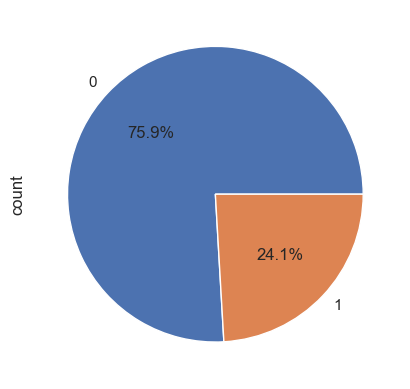

In [80]:
df1['income_binary'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

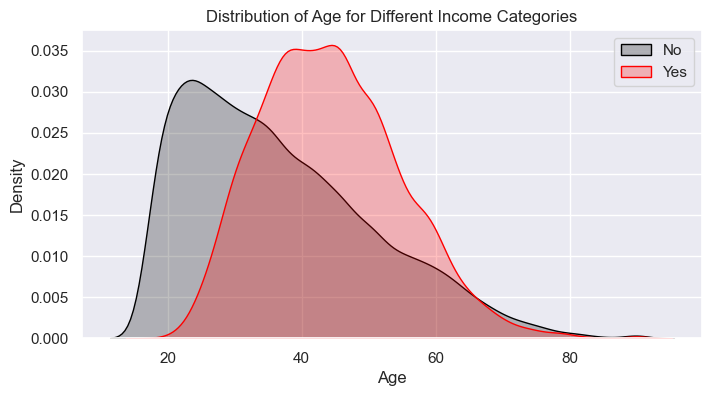

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame
plt.figure(figsize=(8, 4))

# KDE plot for 'Age' when income_binary is '0'
sns.kdeplot(df1[df1['income_binary'] == 0]['Age'], label='No', color='black', shade=True)

# KDE plot for 'Age' when income_binary is '1'
sns.kdeplot(df1[df1['income_binary'] == 1]['Age'], label='Yes', color='red', shade=True)

plt.title('Distribution of Age for Different Income Categories')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

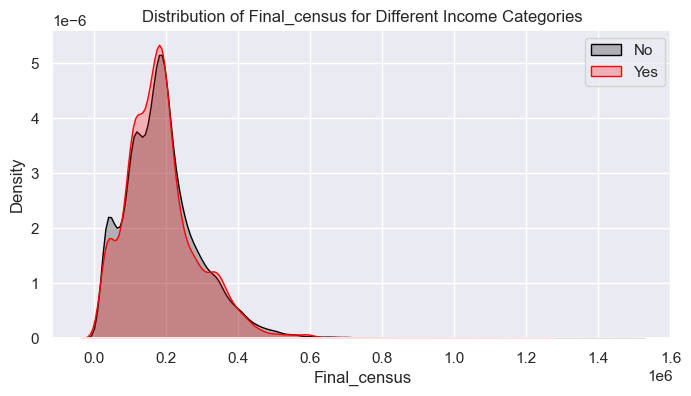

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame
plt.figure(figsize=(8, 4))

# KDE plot for 'Age' when income_binary is '0'
sns.kdeplot(df1[df1['income_binary'] == 0]['Final_census'], label='No', color='black', shade=True)

# KDE plot for 'Age' when income_binary is '1'
sns.kdeplot(df1[df1['income_binary'] == 1]['Final_census'], label='Yes', color='red', shade=True)

plt.title('Distribution of Final_census for Different Income Categories')
plt.xlabel('Final_census')
plt.ylabel('Density')
plt.legend()
plt.show()

In [85]:
X = df1.drop('income_binary',axis = 1)
y = df1['income_binary']

In [86]:
X.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Education_encoded,marital-status_encoded,relationship_encoded,Gender_encoded,Profession Class_ ?,Profession Class_ Federal-gov,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,country_ ?,country_ Cambodia,country_ Canada,country_ China,country_ Columbia,country_ Cuba,country_ Dominican-Republic,country_ Ecuador,country_ El-Salvador,country_ England,country_ France,country_ Germany,country_ Greece,country_ Guatemala,country_ Haiti,country_ Holand-Netherlands,country_ Honduras,country_ Hong,country_ Hungary,country_ India,country_ Iran,country_ Ireland,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,2174,0,40,9,4,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,9,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,11,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,9,2,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
X.shape

(32561, 81)

In [88]:
y.value_counts()

income_binary
0    24720
1     7841
Name: count, dtype: int64

In [89]:
!pip install -U imbalanced-learn scikit-learn

In [90]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print((y.value_counts(), y_smote.value_counts()))

(income_binary
0    24720
1     7841
Name: count, dtype: int64, income_binary
0    24720
1    24720
Name: count, dtype: int64)


In [91]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [92]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assume X_train is your feature matrix
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert X_train_scaled to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)



In [ ]:
# Random foreset classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled_df ,y_train)

RandomForestClassifier()

In [94]:
y_predict_train = rf.predict(X_train_scaled_df )
y_predict_test = rf.predict(X_test_scaled)

In [95]:
# Evaluation matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [96]:
print(classification_report(y_train,y_predict_train))
print('************'*5)
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19782
           1       1.00      1.00      1.00     19770

    accuracy                           1.00     39552
   macro avg       1.00      1.00      1.00     39552
weighted avg       1.00      1.00      1.00     39552

************************************************************
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4938
           1       0.91      0.89      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888



In [97]:
print(confusion_matrix(y_train,y_predict_train))
print('************'*5)
print(confusion_matrix(y_test,y_predict_test))

[[19782     0]
 [    0 19770]]
************************************************************
[[4497  441]
 [ 554 4396]]


In [98]:
print(accuracy_score(y_train,y_predict_train))
print('************'*5)
print(accuracy_score(y_test,y_predict_test))

1.0
************************************************************
0.8993729773462783


In [ ]:
# Crossvalidation

In [99]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, X_train_scaled_df , y_train , cv =10)
print("Avg Accu:",training_accuracy.mean())
print("max Accu:",training_accuracy.max())
print("min Accu:",training_accuracy.min())

Avg Accu: 0.8977548801673016
max Accu: 0.9061946902654867
min Accu: 0.8912768647281921


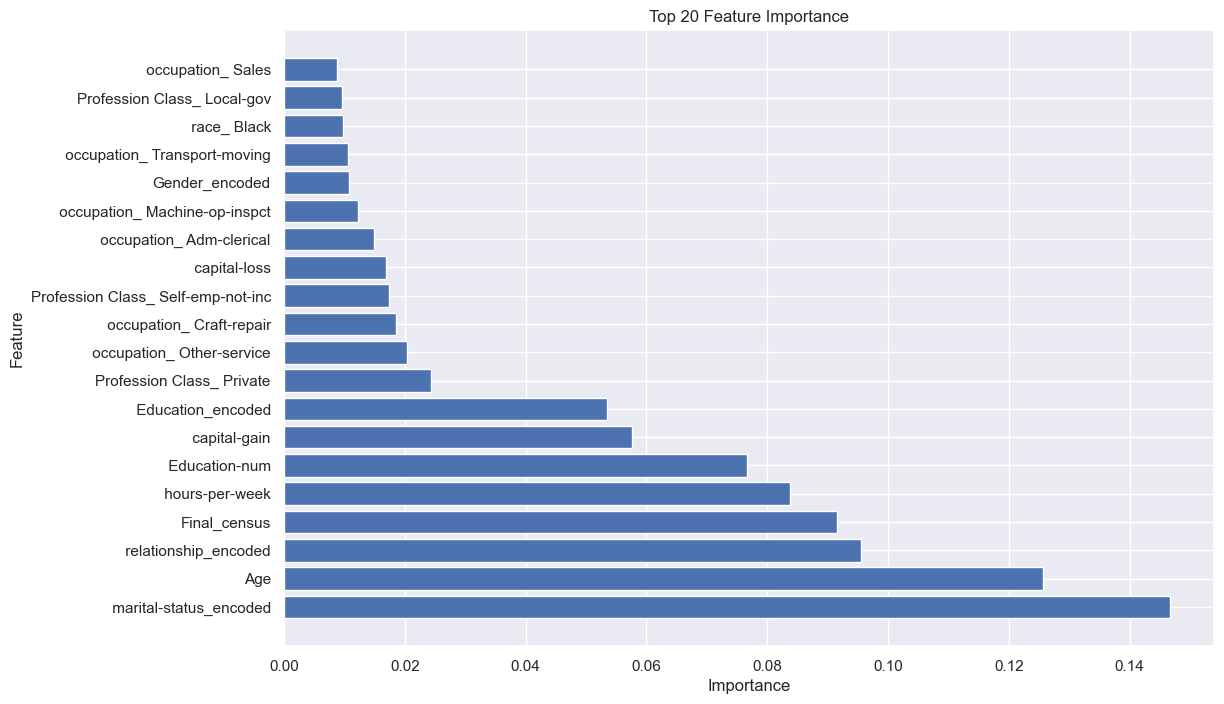

In [100]:
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train_scaled_df.columns  # Fix: Use `columns` instead of `column`

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.show()

In [102]:
# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Convert the top 20 features to a dictionary
top_20_dict = top_20_features.set_index('Feature').to_dict()['Importance']

print(top_20_dict)

{' marital-status_encoded': 0.14663789065867155, 'Age': 0.12561535243227473, ' relationship_encoded': 0.09547726552057827, 'Final_census': 0.09153456666167727, ' hours-per-week': 0.08379786076660627, ' Education-num': 0.07657760605974188, ' capital-gain': 0.05759074795264456, ' Education_encoded': 0.05349293873496191, 'Profession Class_ Private': 0.024350406871969252, ' occupation_ Other-service': 0.020429452068886696, ' occupation_ Craft-repair': 0.018468704204951298, 'Profession Class_ Self-emp-not-inc': 0.01733656688240523, ' capital-loss': 0.016831527380265426, ' occupation_ Adm-clerical': 0.014842565572281747, ' occupation_ Machine-op-inspct': 0.012243884297686723, 'Gender_encoded': 0.010727640500394238, ' occupation_ Transport-moving': 0.010576259112293167, ' race_ Black': 0.00976640683405179, 'Profession Class_ Local-gov': 0.009650212623860784, ' occupation_ Sales': 0.008795717593995134}


In [103]:
# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features and create a new DataFrame
top_20_features_df = feature_importance_df.head(20)

# Display the new DataFrame
print(top_20_features_df)

                               Feature  Importance
7               marital-status_encoded    0.146638
0                                  Age    0.125615
8                 relationship_encoded    0.095477
1                         Final_census    0.091535
5                       hours-per-week    0.083798
2                        Education-num    0.076578
3                         capital-gain    0.057591
6                    Education_encoded    0.053493
14           Profession Class_ Private    0.024350
27           occupation_ Other-service    0.020429
22            occupation_ Craft-repair    0.018469
16  Profession Class_ Self-emp-not-inc    0.017337
4                         capital-loss    0.016832
20            occupation_ Adm-clerical    0.014843
26       occupation_ Machine-op-inspct    0.012244
9                       Gender_encoded    0.010728
33        occupation_ Transport-moving    0.010576
36                         race_ Black    0.009766
12         Profession Class_ Lo

In [104]:
Top_20 = pd.DataFrame(top_20_features_df)
Top_20 

,Feature,Importance
7,marital-status_encoded,0.146638
0,Age,0.125615
8,relationship_encoded,0.095477
1,Final_census,0.091535
5,hours-per-week,0.083798
2,Education-num,0.076578
3,capital-gain,0.057591
6,Education_encoded,0.053493
14,Profession Class_ Private,0.024350
27,occupation_ Other-service,0.020429


In [105]:
print("Unique values in 'marital-status_encoded':", df1[' marital-status_encoded'].unique())

Unique values in 'marital-status_encoded': [4 2 0 3 5 1 6]


In [107]:
print("Unique values in 'marital-status_encoded':", df[' marital-status'].unique())

Unique values in 'marital-status_encoded': [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [108]:
# Assuming df1 and df are your DataFrames
unique_encoded_values = pd.Series(df1[' marital-status_encoded'].unique(), name=' marital-status_encoded')
unique_original_values = pd.Series(df[' marital-status'].unique(), name=' marital-status')

# Create DataFrames from the Series
df_encoded = pd.DataFrame(unique_encoded_values)
df_original = pd.DataFrame(unique_original_values)

# Concatenate DataFrames vertically
result_df = pd.concat([df_encoded, df_original], axis=1)
# Sort the DataFrame by the "marital-status_encoded" column
result_df = result_df.sort_values(by=' marital-status_encoded')

# Resetting the index is optional if you want a new sequential index
result_df = result_df.reset_index(drop=True)

# Display the sorted result DataFrame
print(result_df)

    marital-status_encoded          marital-status
0                        0                Divorced
1                        1       Married-AF-spouse
2                        2      Married-civ-spouse
3                        3   Married-spouse-absent
4                        4           Never-married
5                        5               Separated
6                        6                 Widowed


In [109]:
contingency_table = pd.crosstab(df1[' marital-status_encoded'], df1['income_binary'])
print(contingency_table)

income_binary                0     1
 marital-status_encoded             
0                         3980   463
1                           13    10
2                         8284  6692
3                          384    34
4                        10192   491
5                          959    66
6                          908    85


# XG boost classifier

In [110]:
!pip install xgboost

In [111]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on your training data
xgb_classifier.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = xgb_classifier.predict(X_train_scaled)

# Predict on the test set
y_test_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print the classification report for the test set
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.8939876618122977
Testing Accuracy: 0.8933050161812298
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4938
           1       0.89      0.90      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888



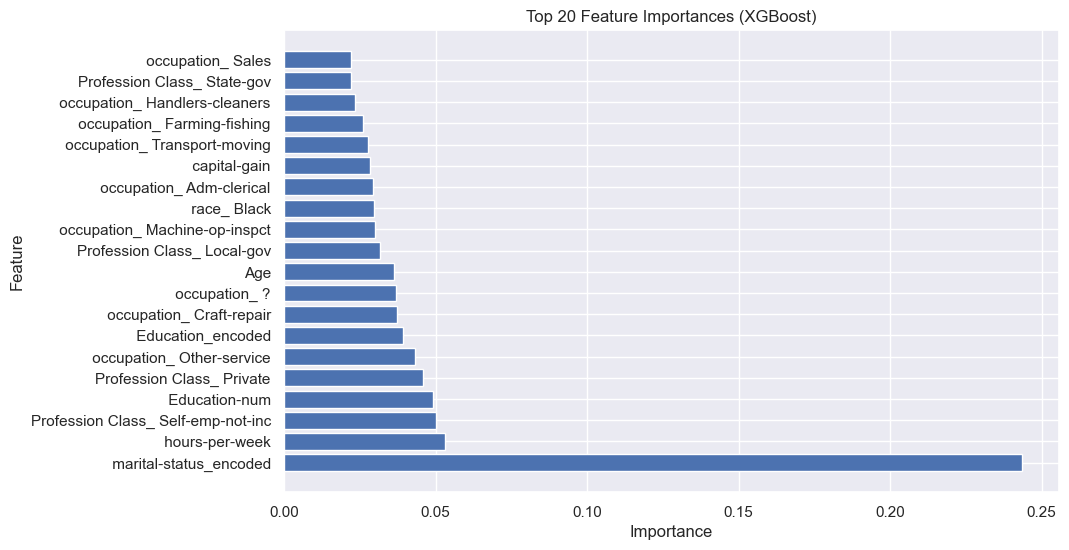

In [113]:
# Assuming xgb_classifier is your XGBClassifier instance
feature_importances = xgb_classifier.feature_importances_

# Get the indices of the top 20 features
top_20_indices = feature_importances.argsort()[-20:][::-1]

# Get the names of the top 20 features
top_20_features = X_train.columns[top_20_indices]

# Plot feature importances for the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_20_features)), feature_importances[top_20_indices])
plt.yticks(range(len(top_20_features)), top_20_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.show()

# GDboosting

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are your training and testing data
# You should replace these with your actual data

# Initialize a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages (trees)
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=3,  # Maximum depth of the individual trees
    random_state=42  # Random seed for reproducibility
)

# Fit the model on your training data
gb_classifier.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = gb_classifier.predict(X_train_scaled)

# Predict on the test set
y_test_pred = gb_classifier.predict(X_test_scaled)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print the classification report for the test set
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.8943163430420712
Testing Accuracy: 0.8943163430420712
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4938
           1       0.89      0.90      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888



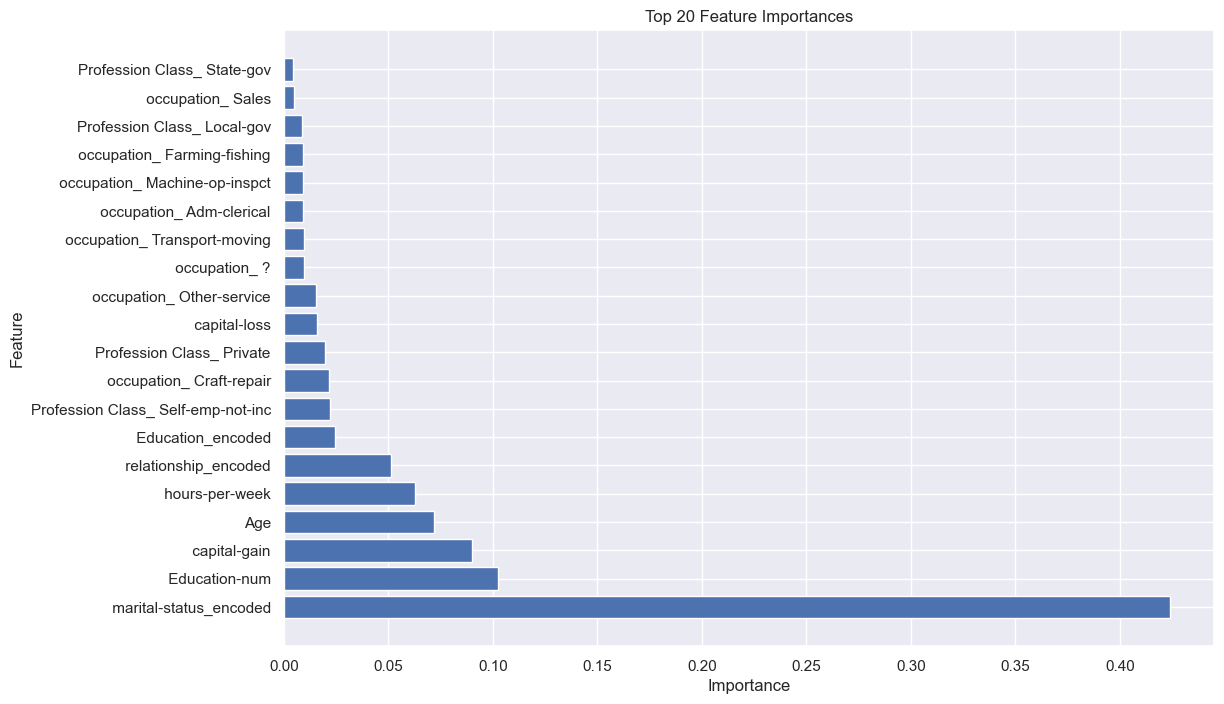

In [115]:
import matplotlib.pyplot as plt

# Assuming gb_classifier is your GradientBoostingClassifier instance
feature_importances = gb_classifier.feature_importances_

# Get the indices of the top 20 features
top_20_indices = feature_importances.argsort()[-20:][::-1]

# Get the names of the top 20 features
top_20_features = X_train.columns[top_20_indices]

# Plot feature importances for the top 20 features
plt.figure(figsize=(12, 8))
plt.barh(top_20_features, feature_importances[top_20_indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.show()

In [ ]:
# SVM

In [116]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target vector
# You should replace these with your actual data

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Fit the model on your training data
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = svm_classifier.predict(X_train_scaled)

# Predict on the test set
y_test_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print the classification report for the test set
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.8966171116504854
Testing Accuracy: 0.8894619741100324
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4938
           1       0.93      0.84      0.88      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888



In [ ]:
# KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target vector
# You should replace these with your actual data

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a KNN classifier (you can adjust the 'n_neighbors' parameter)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on your training data
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = knn_classifier.predict(X_train_scaled)

# Predict on the test set
y_test_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print the classification report for the test set
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.913405137540453
Testing Accuracy: 0.8724716828478964
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4938
           1       0.89      0.85      0.87      4950

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888



In [101]:
# Model            Testing Accuracy      Training Accuracy
# RANDOM FOREST      0.8989             (ava) 0.8977              
# XG Boosting        0.8933              0.8939
# GD Boosting        0.8943              0.8943
# SVM                0.8894              0.8966
# KNN                0.8724              0.9134


In [122]:
# Assuming you have a trained model called 'rf_classifier'
# and 'X_train_scaled' is your scaled training data

# Save the model to a file
joblib.dump(rf_classifier, 'Salary_Prediction_model.joblib')




['Salary_Prediction_model.joblib']

In [121]:
# Save the scaled training data to a file (optional but useful for consistency)
joblib.dump(X_train_scaled, 'X_train_scaled.joblib')


['X_train_scaled.joblib']

<!-- Sr.     Feature                       Importance
7   marital-status_encoded            0.140356
0   Age                               0.130114
8   relationship_encoded               0.094899
1   Final_census                      0.091276
5   hours-per-week                    0.080123
2   Education-num                     0.074920
3   capital-gain                      0.058258
6   Education_encoded                 0.054866
14  Profession Class_ Private          0.023606
22  occupation_ Craft-repair           0.019966
27  occupation_ Other-service          0.019894
16  Profession Class_ Self-emp-not-inc  0.017301
4   capital-loss                      0.017120
20  occupation_ Adm-clerical           0.015848
26  occupation_ Machine-op-inspct      0.013122
9   Gender_encoded                     0.010874
33  occupation_ Transport-moving        0.010819
36  race_ Black                         0.009921
12  Profession Class_ Local-gov         0.009627
31  occupation_ Sales                    0.009620 -->